In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Learning/MIT Data Science/CardioGood Fitness Data Analysis/CardioGoodFitness.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Identify unique values in each column

In [ ]:
column = df.columns
for i in column:
  print(i,df[i].unique(),sep='\n')

Product
['TM195' 'TM498' 'TM798']
Age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender
['Male' 'Female']
Education
[14 15 12 13 16 18 20 21]
MaritalStatus
['Single' 'Partnered']
Usage
[3 2 4 5 6 7]
Fitness
[4 3 2 1 5]
Income
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles
[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


# Explore Age

Observation:
- TM195 and TM498 have border range in age, while TM798 shows a majority of users around 25 to 30 years old.

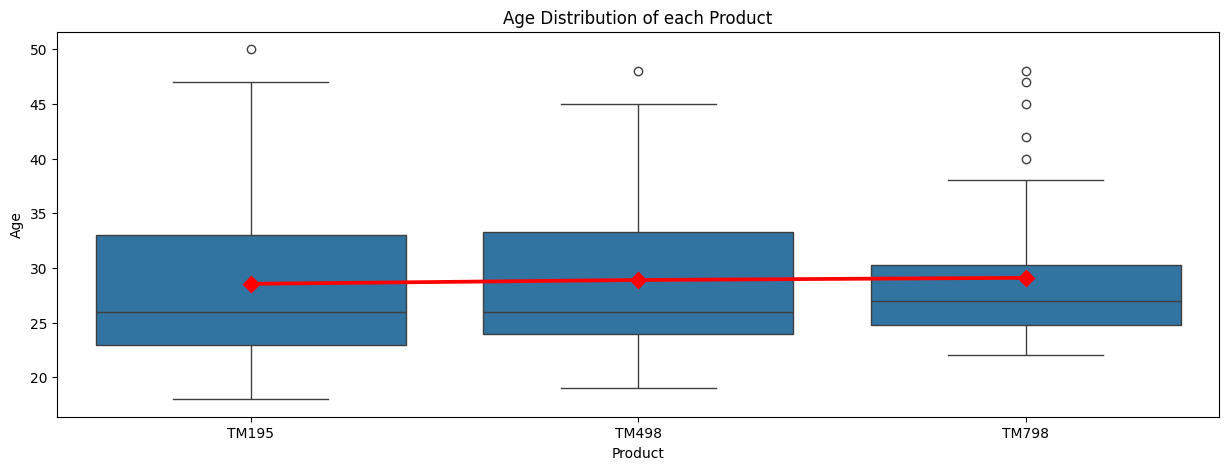

In [ ]:
plt.figure(figsize=(15,5))
# Create the boxplot
sns.boxplot(data=df, x='Product', y='Age')

# Add pointplot to show the average values
sns.pointplot(data=df, x='Product', y='Age', errorbar=None, color='red', markers='D',)

plt.title('Age Distribution of each Product')
# Show plot
plt.show()

# Explore Gender

Observation:
- TM195 is used by the most users, followed by TM498, then TM798
- While the proportion of male and female in using the TM195 and TM498 are mostly equal, there are way more male users use TM798.

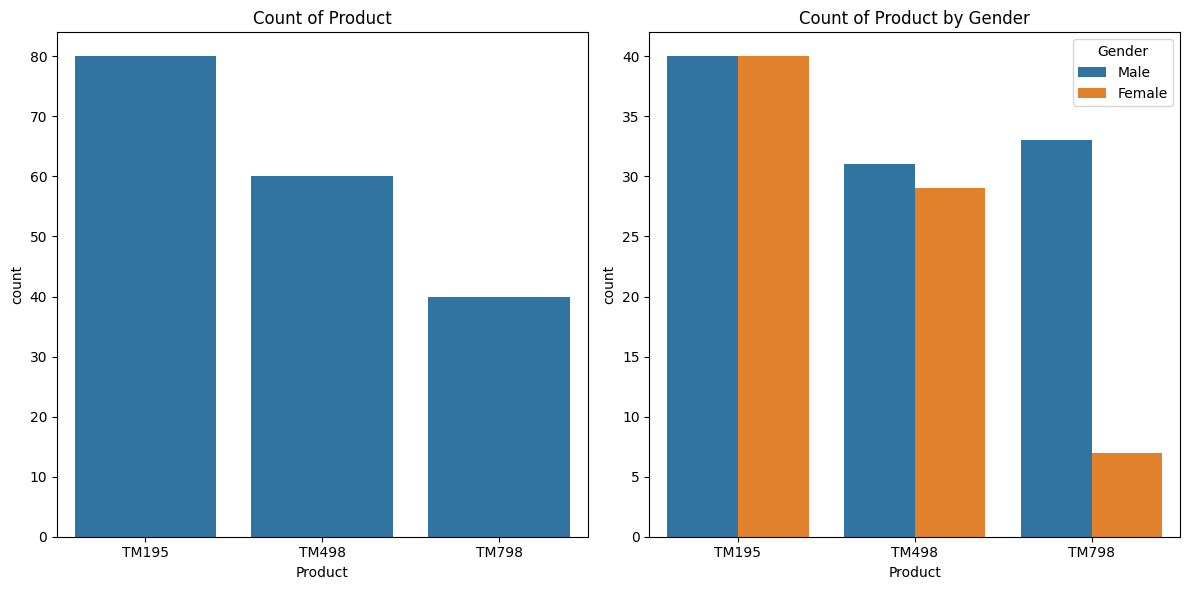

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first countplot in the first subplot
sns.countplot(data=df, x='Product', ax=axes[0])

# Plot the second countplot in the second subplot
sns.countplot(data=df, x='Product', hue='Gender', ax=axes[1])

# Set titles for each subplot
axes[0].set_title('Count of Product')
axes[1].set_title('Count of Product by Gender')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Explore Education

Observation:
- The education year of those who are using TM798 is much higher than that of those who are using TM195 and TM498.


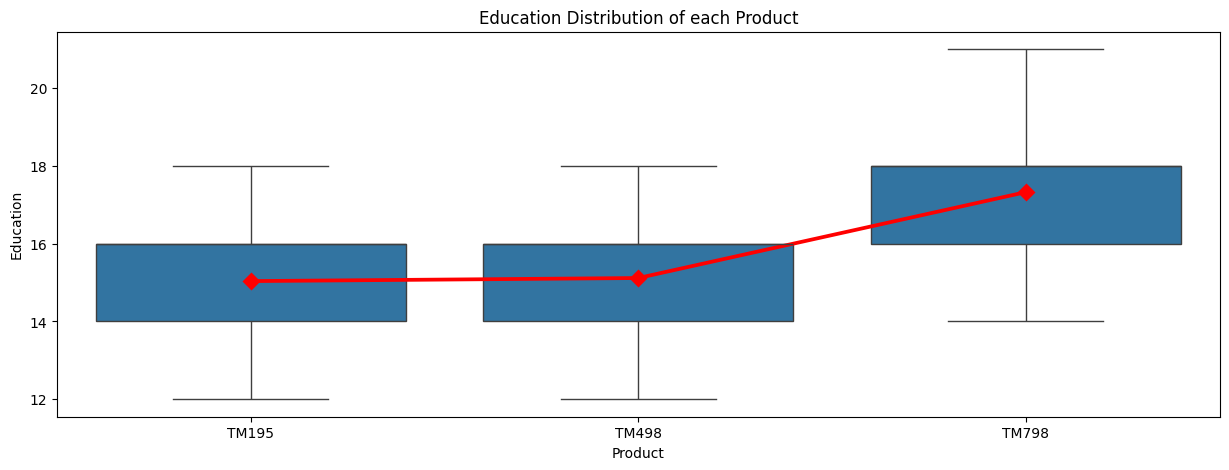

In [ ]:
plt.figure(figsize=(15,5))
# Create the boxplot
sns.boxplot(data=df, x='Product', y='Education')

# Add pointplot to show the average values
sns.pointplot(data=df, x='Product', y='Education', errorbar=None, color='red', markers='D',)

plt.title('Education Distribution of each Product')
# Show plot
plt.show()

# Explore Martial Status

Observation:
- In general among all three products, there are more users who have partners.

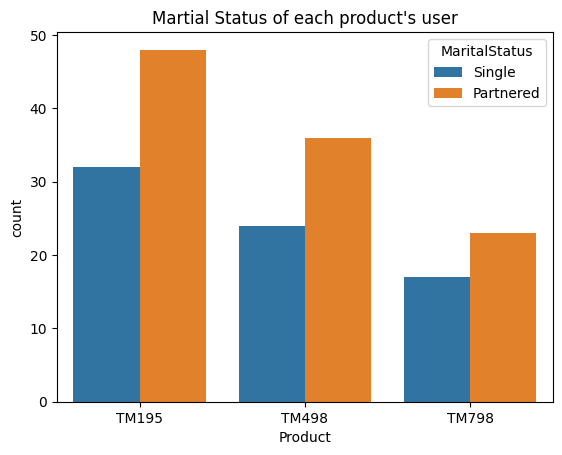

In [ ]:
sns.countplot(data=df,x= 'Product',hue = 'MaritalStatus')
plt.title("Martial Status of each product's user")
plt.show()

# Explore Usage

Observations:
- The majority usage of TM195 and TM498 are 3 and 4.
- TM798 is used more than other two products.

Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64


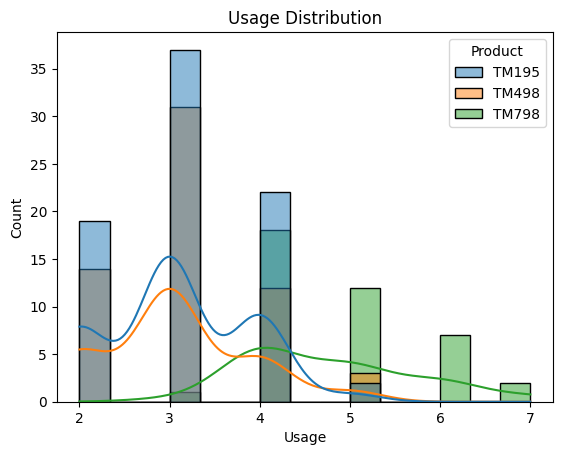

In [ ]:
print(df.groupby('Product')['Usage'].mean())

sns.histplot(data=df,x='Usage',hue='Product',kde = True)
plt.title('Usage Distribution');

# Explore Fitness

Observations:

- Users using TM798 have more fitness than those who use other twp products
- TM195 and TM498 seems to be a useful product for user to maintain normal fitness.

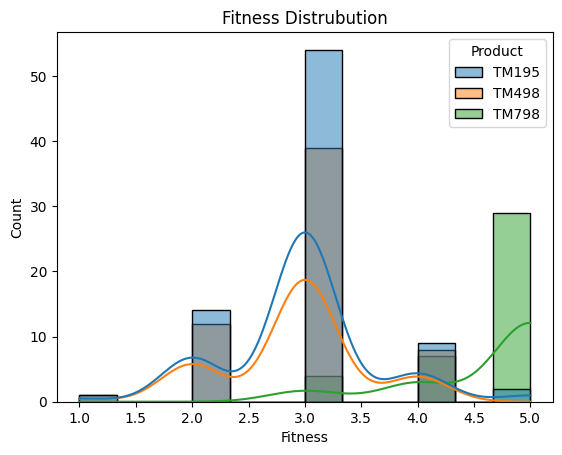

In [ ]:
sns.histplot(data=df,x='Fitness',hue='Product',kde = True)
plt.title('Fitness Distrubution');

# Explore Income

Observations:
- The users of TM798 have significantly higher incomes compared to those of the other two products.

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64


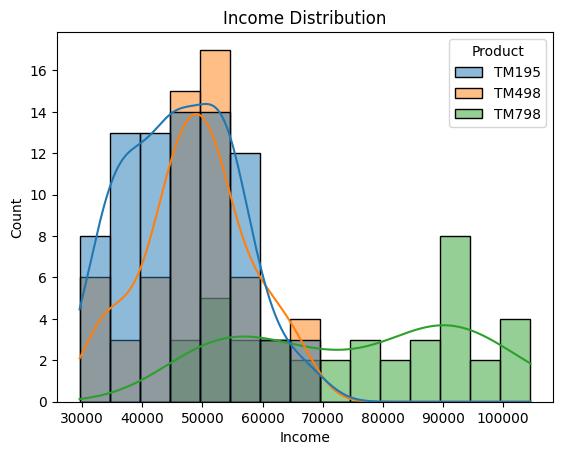

In [ ]:
print(df.groupby(['Product'])['Income'].mean())

sns.histplot(data=df,x='Income',hue='Product',kde = True)
plt.title('Income Distribution');

# Explore Miles

Observation:

- TM798 achieves the highest mileage score, followed by TM198 and then TM195.
- The majority mileage of TM198 and TM195 falls between 50 to 100.

Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64


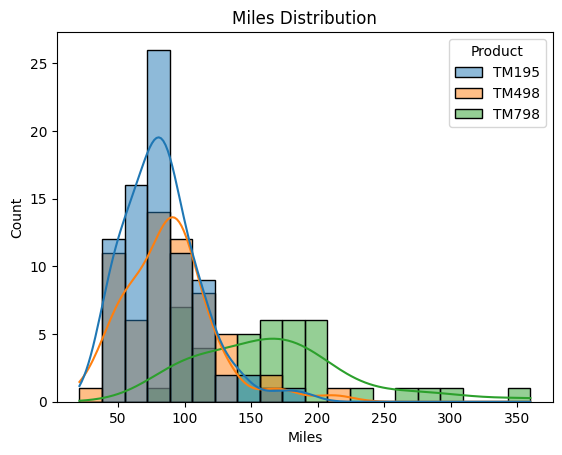

In [ ]:
print(df.groupby(['Product'])['Miles'].mean())


sns.histplot(data=df,x='Miles',hue='Product',kde = True)
plt.title('Miles Distribution');

# Heatmap

<ipython-input-46-2af366b0e523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


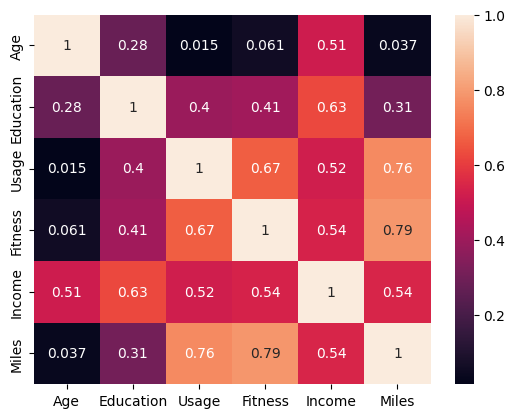

In [ ]:
sns.heatmap(df.corr(), annot=True);

# Conclusion

## Customer Profile of each product

### TM195

TM195 emerges as the most popular product across all genders, boasting the highest sales figures. On average, users intend to engage with it three times per week, maintaining a standard fitness level. However, their projected mileage for walking/running falls below that of the other two products.

### TM498

As for TM498, its customer profile closely mirrors that of TM195. The key point of differentiation lies in the users' intentions to cover greater distances through walking/running with this product.

### TM798
TM798, on the other hand, caters to a more specialized demographic. Despite selling the fewest units, it stands out significantly in various metrics compared to the other two products. Noteworthy distinctions include:

- More attractive to male users.
- Be used more times, reaching 4.7 times/week in average.
- Users are more fitness with higher income.
- Users plan to walk/run more than 2 times on mileage comparing to other two products.

## Recommendation

1. **Enhance TM195 Marketing and Product Development:**
Given TM195's popularity across all genders and its position as the product with the highest sales, it is recommended to capitalize on its market appeal through targeted marketing campaigns. Additionally, consider exploring product improvements or accessory offerings to increase its usage and appeal, potentially encouraging users to increase their mileage.

2. **Position TM498 for Intermediate Users:**
TM498 users show a tendency to plan for more mileage compared to TM195 users, indicating a slightly more ambitious fitness goal. Marketing strategies should highlight TM498’s suitability for users looking to challenge themselves further in their fitness journeys. Moreover, offering tailored training programs or app integrations that help users achieve and track these increased mileage goals could enhance product value.

3. **Target Niche Marketing for TM798:**
The TM798’s appeal to a specific demographic—predominantly male users with higher fitness levels and income—suggests a niche market strategy. Emphasize the premium features of TM798 that cater to these users' needs, such as advanced tracking capabilities, durability for higher mileage, and integration with high-end fitness apps. Partnerships with fitness influencers or platforms that resonate with this demographic could improve visibility and desirability.

4. **Cross-Sell and Upsell Opportunities:**
Utilize the data to identify potential cross-sell and upsell opportunities between the product lines. For instance, TM195 users showing progress in their fitness goals could be targeted with promotions for TM498 as a next-step product. Similarly, engaged TM498 users demonstrating high usage and seeking further challenges could be prime candidates for TM798 upselling.

5. **Feedback and Continuous Improvement:**
Implement a structured feedback mechanism to gather insights directly from the users of each product line. This feedback can guide continuous improvement in product features, user experience, and customer service. Consider leveraging social media and online forums as platforms for community building and feedback gathering.

6. **Invest in User Experience and Technology:**
Recognizing the varying fitness goals and usage patterns across the product lines, investing in technology that enhances the user experience is paramount. This includes app integrations, virtual training sessions, and personalized fitness tracking. Technology that supports users in achieving their fitness goals can increase product stickiness and brand loyalty.

In [ ]:
for i in df.columns:
  if df[i].dtype != object:
    print(i)
    print(df.groupby('Product')[i].mean())
    print(' ')

Age
Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64
 
Education
Product
TM195    15.037500
TM498    15.116667
TM798    17.325000
Name: Education, dtype: float64
 
Usage
Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64
 
Fitness
Product
TM195    2.9625
TM498    2.9000
TM798    4.6250
Name: Fitness, dtype: float64
 
Income
Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64
 
Miles
Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64
 
